In [ ]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import re
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from google.colab import drive  #mount google drive on colab to get access to data stored in gdrive.
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_data=pd.read_csv('/content/gdrive/MyDrive/Titanic Dataset/train.csv')    #Read and fetch data from .csv file present in the specified directory and store it in declared variable. 


In [ ]:
#Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
train_data.info()

# survival:    Survival 
# PassengerId: Unique Id of a passenger. 
# pclass:    Ticket class  1st 2nd and 3rd class
# sex:    Sex     
# Age:    Age in years     
# sibsp:    # of siblings / spouses aboard the Titanic  (Siblings relation)   
# parch:    # of parents / children aboard the Titanic     (Parent/Child relation)
# ticket:    Ticket number     
# fare:    Passenger fare     
# cabin:    Cabin number     
# embarked:   Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) means that from where the passengers get on the ship

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.head(10) #displaying the first 10 index of dataset of titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
total = train_data.isnull().sum().sort_values(ascending=False) #sum of number of missing values in the dataset
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100 #converting it into percentage
percent_2 = (round(percent_1, 1)).sort_values(ascending=False) #rounding the percentage value
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])  #preparing the table for display
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


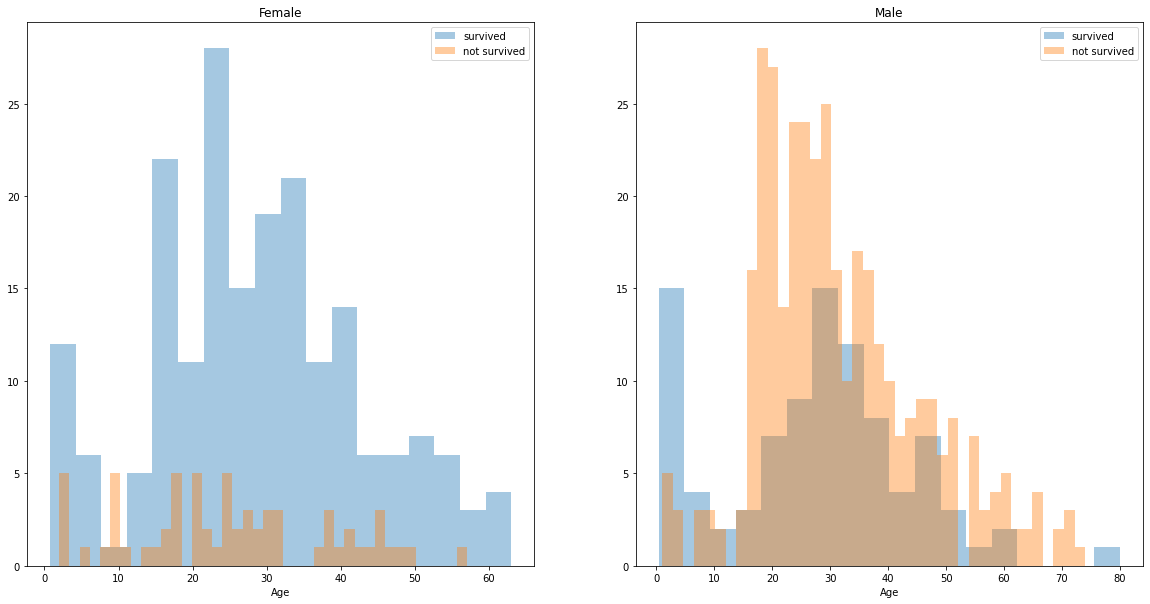

In [ ]:
# Plotting of Number of survivals against age and sex
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 10)) #declaraing the plotting figure size
women = train_data[train_data['Sex']=='female']  #storing the female sex count from titanic dataset in declared variable 'Women'
men = train_data[train_data['Sex']=='male']     #storing the male sex count from titanic dataset in declared variable 'Men'
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False) #handling data for plotting of females sex that have survived
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False) #handling data for plotting of females sex that have not survived
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)  #handling data for plotting of males sex that have survived
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False) #handling data for plotting of males sex that have not survived
ax.legend()
_ = ax.set_title('Male')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


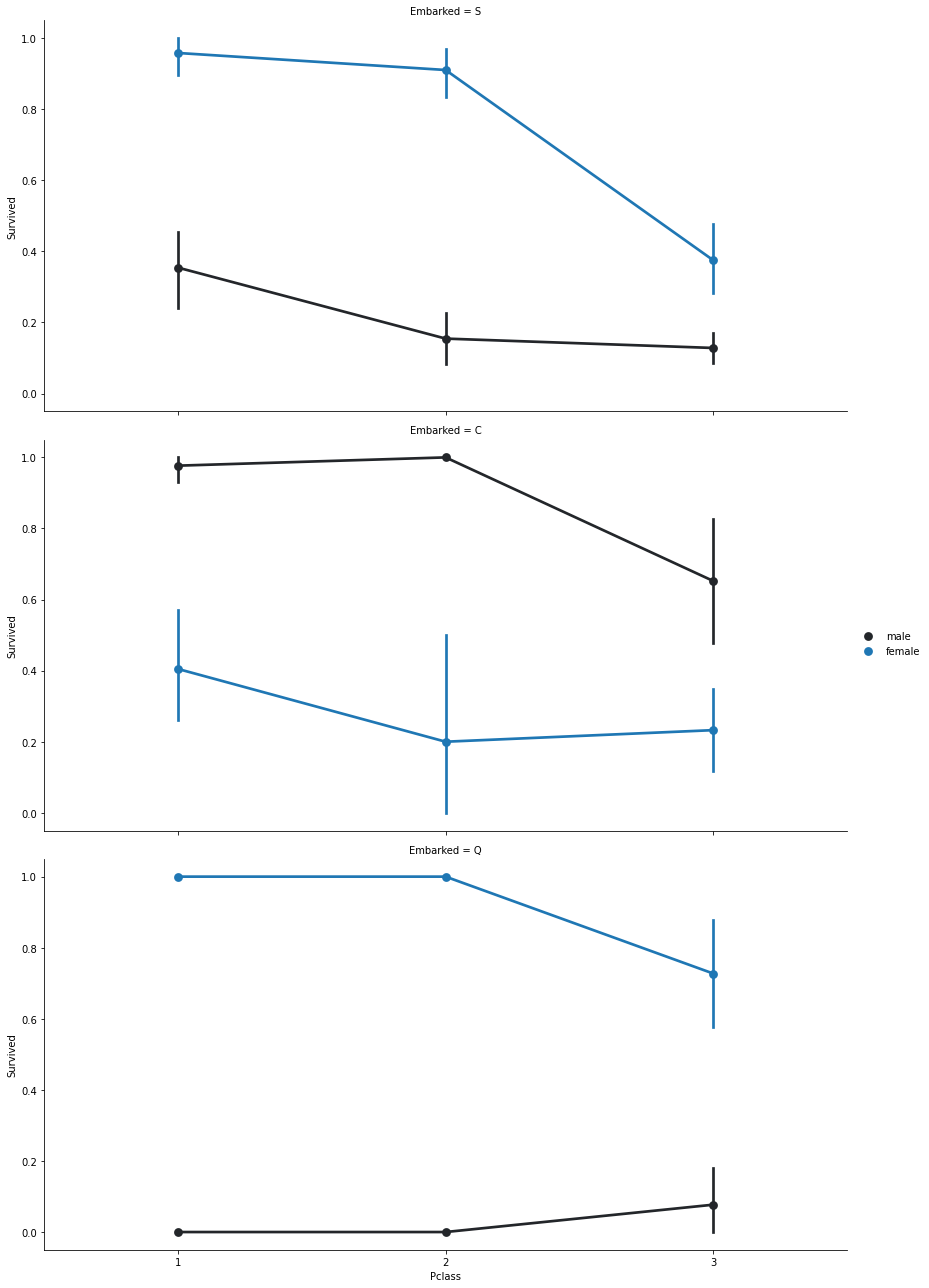

In [ ]:
# Plotting of surviving percentage for both sex with different ticket class and boarded from different stops during the journey
FacetGrid = sns.FacetGrid(train_data, row='Embarked', size=6, aspect=2) 
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

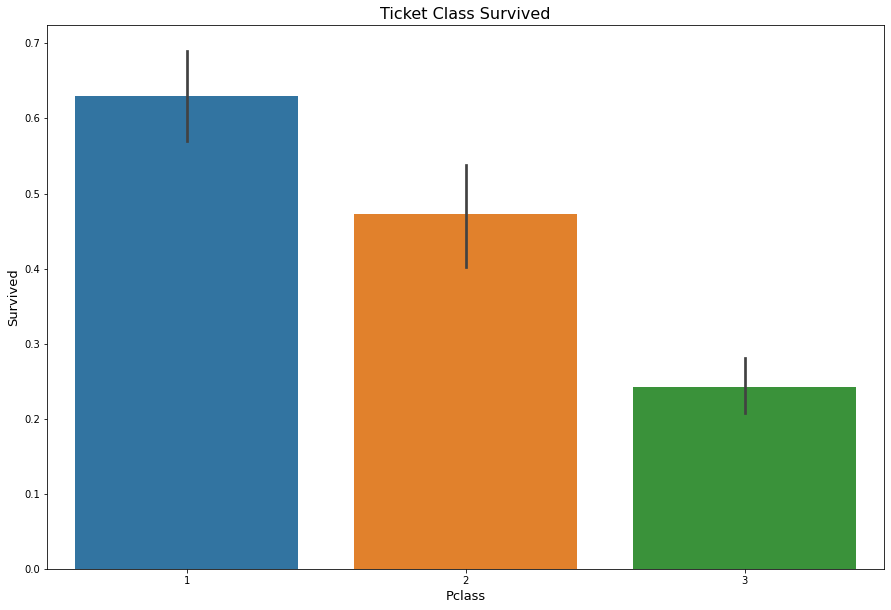

In [ ]:
# Percentage of survived passangers belonging to different ticket class
plt.figure(figsize=(15,10))
plt.xlabel('xlabel', fontsize=13)
plt.ylabel('ylabel', fontsize=13)
plt.title("Ticket Class Survived",fontsize=16)
sns.barplot(x='Pclass', y='Survived', data=train_data)

In [ ]:
data = [train_data]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_data['not_alone'].value_counts()

# 0 means that passanger is with relatives
# 1 means that passanger is alone

1    537
0    354
Name: not_alone, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


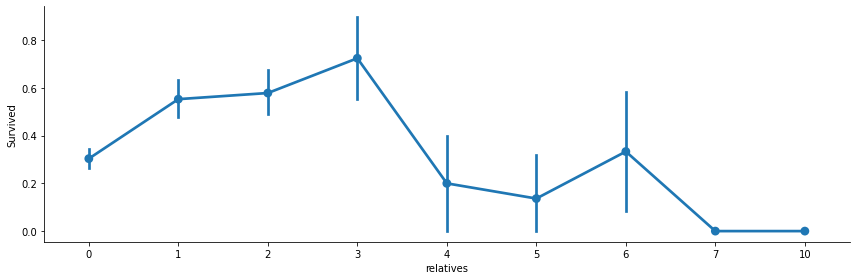

In [ ]:
# Number of relatives that were on the ship and have survived
axes = sns.factorplot('relatives','Survived', 
                      data=train_data, size=4, aspect=3 )

In [ ]:
# Dropping the Passanger Id and Ticket number as this information is useless and couldnt help us in predicting the survived passangers.
train_data = train_data.drop(['PassengerId'], axis=1)
train_data = train_data.drop(['Ticket'], axis=1)


In [ ]:
#creating a new feature 'deck' from the cabin number 
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8} #Numerical labels for alphabets used in specifying Cabin number
data = [train_data]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")  
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)  #Mapping new values into deck feature.
    dataset['Deck'] = dataset['Deck'].fillna(0) #Missing values will be converted to 0
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_data = train_data.drop(['Cabin'], axis=1)


In [ ]:
#Filling the missing values of age by finding the mean and standard deviation first. Then generate random numbers using mean and standard deviation and fill the gaps.
data = [train_data]

for dataset in data:
    mean = train_data["Age"].mean()
    std = train_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)

In [ ]:
#As most of the data contains Embarked value 'S' means that most of the passangers present in the ship were from Southampton embark.
common_value = 'S'
data = [train_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
train_data.info()
#As we can see from the data description that all the missing values are filled properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Fare       891 non-null    float64
 8   Embarked   891 non-null    object 
 9   relatives  891 non-null    int64  
 10  not_alone  891 non-null    int64  
 11  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 83.7+ KB


In [ ]:
#As can be seen from the data that Fare values are present in float-datatype. We have to convert it into integer to simplify our data
data = [train_data]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
data = [train_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_data = train_data.drop(['Name'], axis=1)


In [ ]:
# Labeling gender from string to numerical values to help ML models to extract features
genders = {"male": 0, "female": 1}
data = [train_data]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
#Similarly, Embarked (Ports) Character is converted to numerical value
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [ ]:
#This cell makes block of ages and provide unique label each block. The age of the passangers in the ship is labeled according to the block it lies.
data = [train_data]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0   #Assigned 0 label to passanger of age 11 or less
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
    

In [ ]:
# Number of passanger lies in the specified blocks of age
train_data['Age'].value_counts()

6    168
4    163
5    143
3    130
2    119
1    100
0     68
Name: Age, dtype: int64

In [ ]:
# Blocks labeling of fares
data = [train_data]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
#Splitting the cleaned and proccessed data into training and testing
#X_train= contains all the features for training without survived column
#Y_train= contains the information of survival of passanger against the X_train data. 
#X_test= contains data for testing just like Y_train which will be given to the trained Model to predict the survival
#Y_test contains labels of the X_test and is used to calculate the accuracy of the trained model
X_train, X_test, Y_train, Y_test = train_test_split(train_data.drop(['Survived'],axis=1), 
                                                    train_data['Survived'], test_size=0.10, 
                                                    random_state=101)

In [ ]:
# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_lin = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [ ]:
# Support Vector Machine Model
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred_SVM = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# Decision Tree Model
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred_dt = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

93.01


In [ ]:
from sklearn import metrics
test_dacc=metrics.accuracy_score(Y_pred_dt,Y_test)
print(test_dacc)

0.7888888888888889


In [ ]:
from sklearn import metrics
test_dacc=metrics.accuracy_score(Y_pred_lin,Y_test)
print(test_dacc)

0.8111111111111111


In [ ]:
from sklearn import metrics
test_dacc=metrics.accuracy_score(Y_pred_SVM,Y_test)
print(test_dacc)

0.7777777777777778


In [ ]:
# Plotting the accuracy achieved on Machine Learning Models
acc_data = {'Machine Learning Models': ['Logistic Regression', 'Support Vector Machine', 'Decision Tree'],
        'Accuracy': [acc_log, acc_linear_svc, acc_decision_tree]
        }
df = pd.DataFrame(acc_data)
df

,Machine Learning Models,Accuracy
0,Logistic Regression,81.77
1,Support Vector Machine,81.77
2,Decision Tree,93.38


In [ ]:
print("Classification Report of Linear Regression Model \n %s" %classification_report(Y_test,Y_pred_lin))

Classification Report of Linear Regression Model 
               precision    recall  f1-score   support

           0       0.79      0.86      0.82        51
           1       0.79      0.69      0.74        39

    accuracy                           0.79        90
   macro avg       0.79      0.78      0.78        90
weighted avg       0.79      0.79      0.79        90



In [ ]:
print("Classification Report of Support Vector Machine Model \n %s" %classification_report(Y_test,Y_pred_SVM))

Classification Report of Support Vector Machine Model 
               precision    recall  f1-score   support

           0       0.77      0.86      0.81        51
           1       0.79      0.67      0.72        39

    accuracy                           0.78        90
   macro avg       0.78      0.76      0.77        90
weighted avg       0.78      0.78      0.77        90



In [ ]:
print("Classification Report of Decision Tree Classifier Model \n %s" %classification_report(Y_test,Y_pred_dt))

Classification Report of Decision Tree Classifier Model 
               precision    recall  f1-score   support

           0       0.73      0.88      0.80        51
           1       0.79      0.56      0.66        39

    accuracy                           0.74        90
   macro avg       0.76      0.72      0.73        90
weighted avg       0.75      0.74      0.74        90



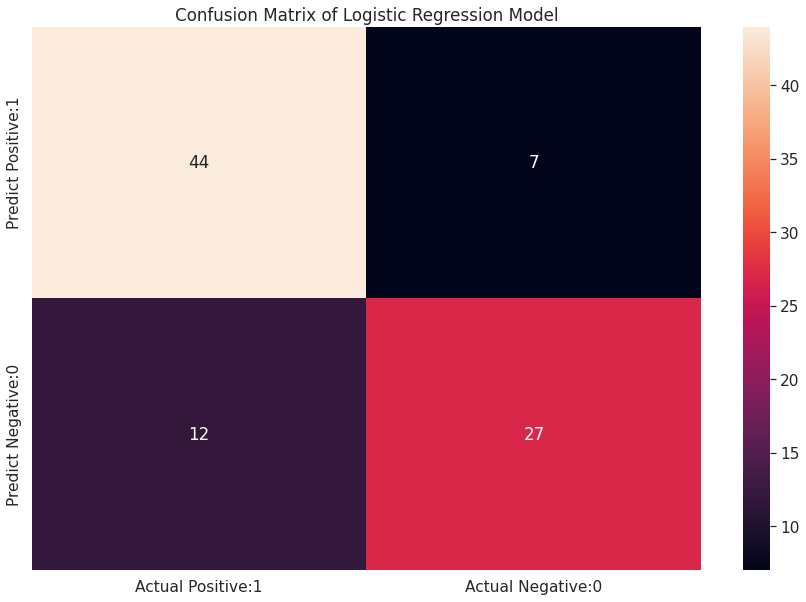

In [ ]:
# Perparing Confusuin Matrix
cm1=confusion_matrix(Y_test,Y_pred_lin)
cm_matrix1 = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
plt.figure(figsize=(15,10))
plt.title("Confusion Matrix of Logistic Regression Model")
sns.set(font_scale=1.4)
sns.heatmap(cm_matrix1, annot=True, fmt='d', cmap='rocket')

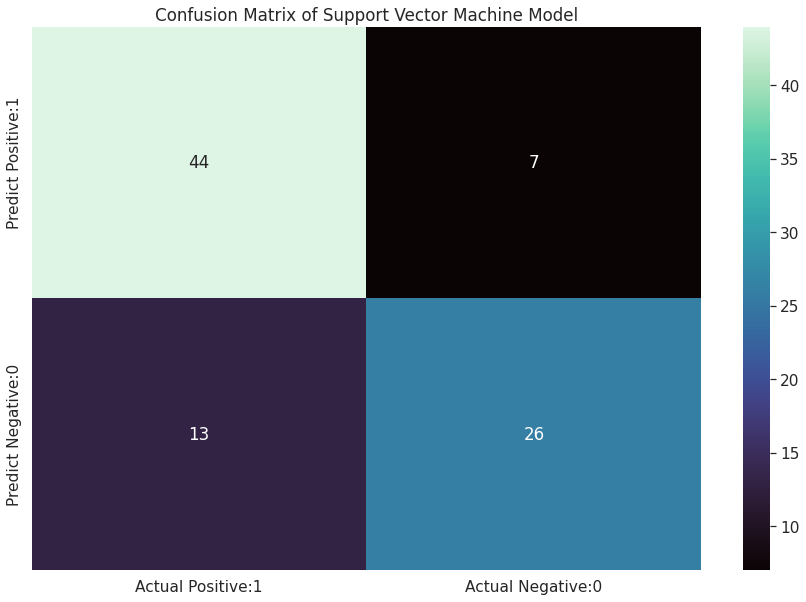

In [ ]:
# Perparing Confusuin Matrix
cm2=confusion_matrix(Y_test,Y_pred_SVM)
cm_matrix2 = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
plt.figure(figsize=(15,10))
plt.title("Confusion Matrix of Support Vector Machine Model")
sns.set(font_scale=1.4)
sns.heatmap(cm_matrix2, annot=True, fmt='d', cmap='mako')

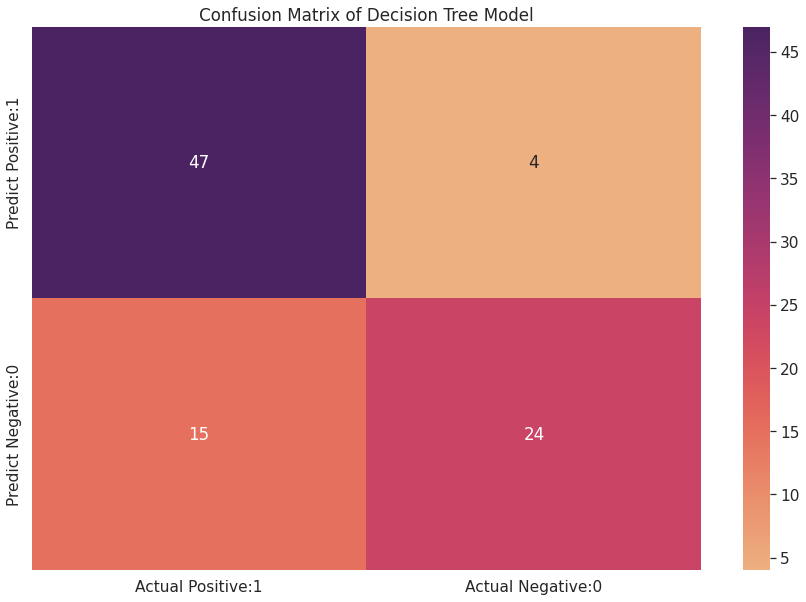

In [ ]:
# Perparing Confusuin Matrix
cm3=confusion_matrix(Y_test,Y_pred_dt)
cm_matrix3 = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
plt.figure(figsize=(15,10))
plt.title("Confusion Matrix of Decision Tree Model")
sns.set(font_scale=1.4)
sns.heatmap(cm_matrix3, annot=True, fmt='d', cmap='flare')